In [26]:
from wflytes.dataProcessing.localWfDataset import LocalWfDataset
import seaborn as sns
import glob
import os
import pandas as pd
from torch.utils.data import DataLoader
%cd /home/isears/Repos/wf-electrolytes

/home/isears/Repos/wf-electrolytes


In [32]:
hadm_ids = [int(h.split("/")[-1]) for h in glob.glob("data/*")]
ds = LocalWfDataset(["II"], hadm_ids=hadm_ids)
dl = DataLoader(ds, batch_size=8, collate_fn=ds.collate_skorch)
for batch in dl:
    X, y = batch
    break
X['X'].shape

[LocalWfDataset] Dataset initialization complete
	Signals: ['II']
	Final # examples: 203194


torch.Size([8, 980, 1])

<AxesSubplot:xlabel='time', ylabel='signal'>

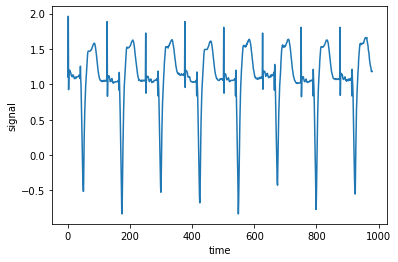

In [38]:
plottable = pd.DataFrame(data={'time': range(0, X['X'].shape[1]), 'signal': X['X'][3,:,0]})
sns.lineplot(data=plottable, x='time', y='signal')